In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/04_graph_practice_dataset.csv', encoding='cp949')
df['날짜'] = pd.to_datetime(df['날짜'])
df.head()

,날짜,지역,제품,매출,이익,고객수,카테고리
0,2024-01-31,서울,A,182,34.916660,930.986807,전자
1,2024-02-29,서울,A,131,21.843166,998.727403,전자
2,2024-03-31,서울,A,172,22.114619,1203.880436,전자
3,2024-04-30,서울,A,94,21.636703,491.932862,전자
4,2024-05-31,서울,A,186,20.698511,1835.592633,전자


In [26]:
month_money= df[['매출','날짜']].groupby('날짜').sum()
month_money['매출']

날짜
2024-01-31    1620
2024-02-29    1594
2024-03-31    1660
2024-04-30    1712
2024-05-31    1773
2024-06-30    1764
2024-07-31    1765
2024-08-31    1657
2024-09-30    1592
2024-10-31    1776
2024-11-30    1495
2024-12-31    1611
Name: 매출, dtype: int64

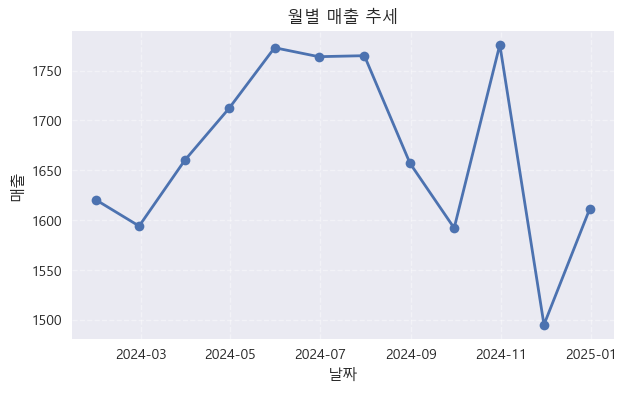

In [30]:
#문제1 월별 전체 매출 추이
plt.figure(figsize=(7,4))
plt.plot(month_money,marker='o',linewidth=2)
plt.title('월별 매출 추세')
plt.xlabel('날짜')
plt.ylabel('매출')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

<Axes: xlabel='날짜', ylabel='매출'>

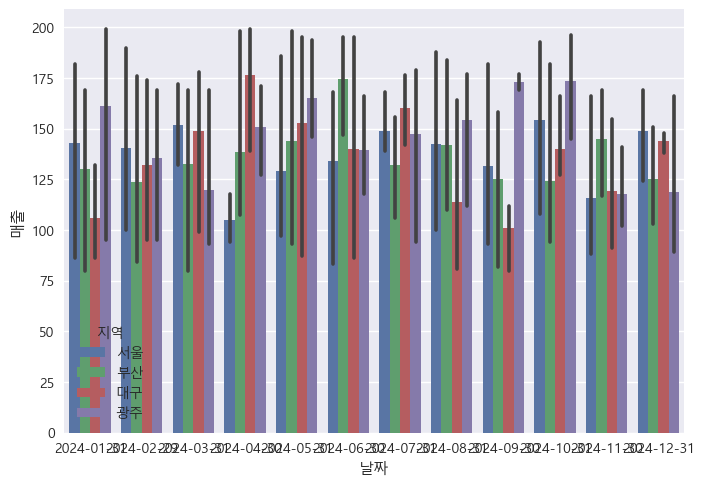

In [88]:
#문제2 지역별 매출 추세 비교
sns.barplot(data=df, x='날짜', y='매출', hue='지역')

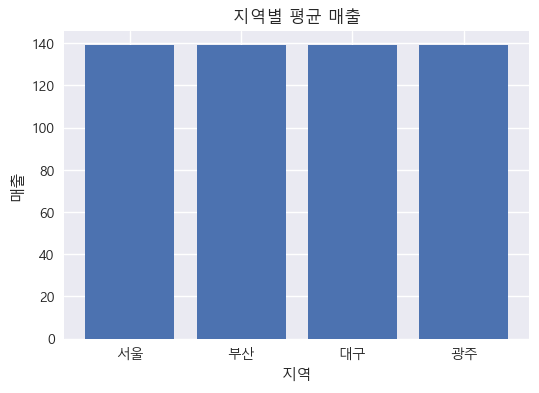

In [63]:
#문제3 지역별 평균 매출
plt.figure(figsize=(6,4))
plt.bar(df['지역'],df['매출'].mean())
plt.title('지역별 평균 매출')
plt.xlabel('지역')
plt.ylabel('매출')
plt.show()

Text(0.5, 1.0, '지역별 제품 평균 매출 비교')

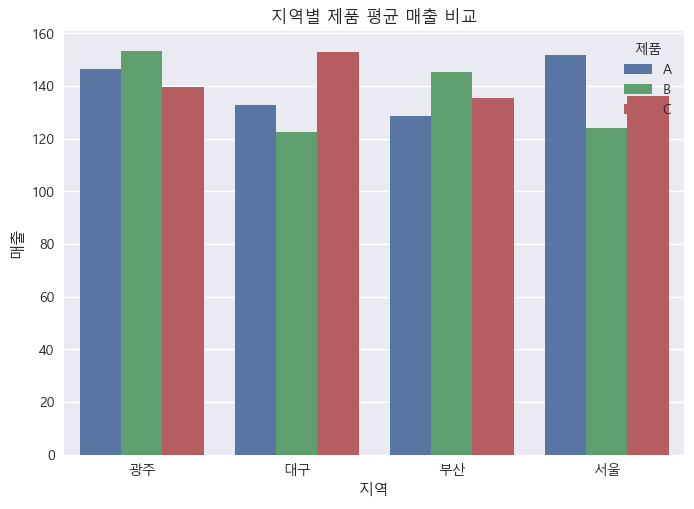

In [96]:
#문제4 지역vs 제품별 매출
df_mean = df.groupby(['지역', '제품'])['매출'].mean().reset_index()
sns.barplot(data=df_mean, x='지역', y='매출', hue='제품')
plt.title('지역별 제품 평균 매출 비교')

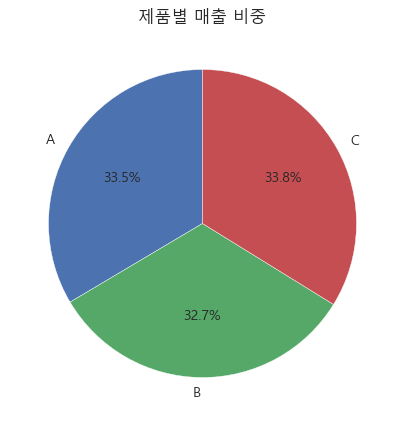

In [103]:
#문제5 제품별 총매출 비중
labels = ['A','B','C']
data = df.groupby('제품')['매출'].sum()
plt.figure(figsize=(5,5))
plt.pie(data, labels=labels, autopct='%.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'white'})
plt.title('제품별 매출 비중')
plt.show()

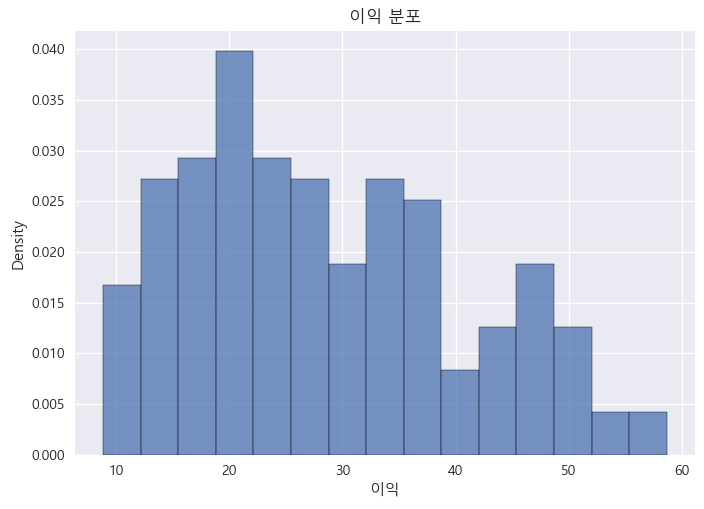

In [108]:
#문제6 이익 분포
plt.figure()
sns.histplot(df['이익'],bins=15,stat='density')
plt.title('이익 분포')
plt.show()

In [ ]:
#문제7 제품별 이익 분포 마
